In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import operator
import os

def draw_plot(data, edge_color, fill_color, N, positions):
    bp = ax.boxplot(data, patch_artist=True, widths = 8, whis = 1, labels = [str(fs) for fs in N],
                    sym = ''.format(edge_color), manage_xticks = False, positions = positions,
                    meanprops =dict(color='black') ) # boxprops=dict(facecolor=edge_color),


    
    for element in ['boxes', 'whiskers', 'medians', 'caps']: #'boxes', 'whiskers', 'fliers', 'medians', 'caps'
        plt.setp(bp[element], color=edge_color)

    plt.setp(bp['fliers'], color=edge_color, markersize = 4)        
    plt.setp(bp['medians'], color='black')        
    return bp["boxes"][0]

In [2]:
! ls ../results/knearst/mexcowalk_orig/

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
open('../results/knearst/mexcowalk_orig/100.txt', 'r')

<_io.TextIOWrapper name='../results/knearst/mexcowalk_orig/100.txt' mode='r' encoding='cp1252'>

mexcowalk_orig
mexcowalk_beta_02


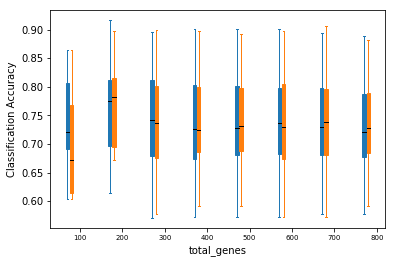

In [17]:
edge_colors = ['C0', 'C1','C2', 'C3', 'C4', 'C6'] #['b', 'g', 'r', 'c', 'm', 'y']
fill_colors = ['C0', 'C2', 'C3', 'C4', 'C6', 'C7']

# models = [
#         "hotnet2",
#         "memcover_v1","memcover_v2","memcover_v3",
#         "mutex_t07_nsep_cov",
#         'hier_hotnet'
#          ]
# legend_ = [
#         "Hotnet2",
#         "MEMCover_v1",
#         "MEMCover_v2",
#         "MEMCover_v3",
#         "MEXCOwalk",
#         "HierHotnet_v2"]

models = [
    'mexcowalk_orig',
    'mexcowalk_beta_02'
]

legend_ = [
    'mexcowalk_orig',
    'mexcowalk_beta_02'
]
plt.figsize= (30,30)
fig, ax = plt.subplots()

legend_artists = []

for idx,(model,edge_color, fill_color,l) in enumerate(zip(models, edge_colors, fill_colors,legend_)):
    print(l)
    sores_per_n = []
    N = list(range(100,600,100))+ list(range(600,900, 100)) #+[554]
#     N = a + list(range(900, 1700, 100)) if model  == 'memcover_v3' else a+list(range(900, 2600, 100))
    ticks = [(f+1)*100 for f in range(len(N))]
    if not model == 'hier_hotnet':

        for n in N:
            results_file = '../results/knearst/revision/undersampel/{}/{}.txt'.format(model, n)
            with open(results_file, 'r') as f:
                lines= f.readlines()
                sores_per_n.append([float(s) for s  in lines[-1].rstrip().split(' ')[1:]])

        positions = [i_+(idx-3)*10 for i_ in ticks]

        l_art = draw_plot(sores_per_n, edge_color, None, N, positions)
        legend_artists.append(l_art)

    else:
        
        N_ = 554

        # for n in [554,806]:
        results_file = '../results/knearst/revision/undersampel/{}/{}.txt'.format('hier_hotnet', N_)
        with open(results_file, 'r') as f:
            lines= f.readlines()
            sores_per_n.append([float(s) for s  in lines[-1].rstrip().split(' ')[1:]])

        scores =  [[] for _ in range(100,600,100)]+sores_per_n
        print('554 plot')
        print(len(N), len(scores))
        positions = [i_+(idx-3)*10 for i_ in ticks[:6]]
        print('554 positions ', positions)
        l_art = draw_plot(scores, 'C8', None,  N[:6] ,positions)
        legend_artists.append(l_art)
            




art = []
xtick = ticks
xticks(xtick, fontsize='x-small')

ax.set_xticklabels(N, fontdict = {'fontsize':'x-small'})
# ax.legend(legend_artists,legend_ , loc=8,fancybox=True, fontsize= 'small', framealpha=0,
#                     edgecolor = 'b', ncol= 4, bbox_to_anchor=(0.5,-0.3))

# legend = plt.legend(legend_, loc=8,fancybox=True, fontsize= 'small', framealpha=0,
#                     edgecolor = 'b', ncol= 4, bbox_to_anchor=(0.5,-0.3))
# art.append(legend)
# frame = legend.get_frame()
# frame.set_facecolor('0.9')
# frame.set_edgecolor('0.9')
plt.xlabel('total_genes')
plt.ylabel('Classification Accuracy')
# grid()

plt.savefig('../results/knearst/revision/plots/Boxplots_Accuracy_0_{}.pdf'.format(0), format = 'pdf',additional_artists=art,
                    bbox_inches="tight", dpi = 800)

plt.show()

mexcowalk_orig
mexcowalk_beta_02


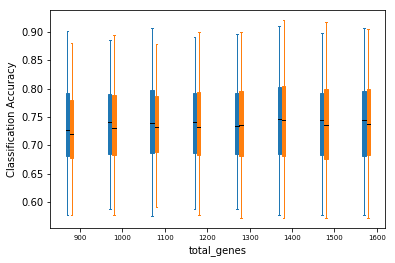

In [14]:
edge_colors = ['C0', 'C1']#,'C2', 'C3', 'C4']#['C0', 'C1', 'C4', 'C2', 'C3']
fill_colors = ['C0', 'C1']#'C2', 'C3', 'C4', 'C6', 'C7']

models = [
    'mexcowalk_orig',
    'mexcowalk_beta_02'
]

legend_ = [
    'mexcowalk_orig',
    'mexcowalk_beta_02'
]

plt.figsize= (30,30)
fig, ax = plt.subplots()

legend_artists = []

for idx,(model,edge_color, fill_color,l) in enumerate(zip(models, edge_colors, fill_colors,legend_)):
    print(l)
    sores_per_n = []
    N =  list(range(900,1700,100)) #[806]+
#     N = a + list(range(900, 1700, 100)) if model  == 'memcover_v3' else a+list(range(900, 2600, 100))
    ticks = [(f+1)*100 for f in range(len(N))]
    if not model == 'hier_hotnet':

        for n in N:
            results_file = '../results/knearst/revision/undersampel/{}/{}.txt'.format(model, n)
            with open(results_file, 'r') as f:
                lines= f.readlines()
                sores_per_n.append([float(s) for s  in lines[-1].rstrip().split(' ')[1:]])

        positions = [i_+(idx-3)*10 for i_ in ticks]

        l_art = draw_plot(sores_per_n, edge_color, None, N, positions)
        legend_artists.append(l_art)

    else:
        
        N_ = 806

        # for n in [554,806]:
        results_file = '../results/knearst/revision/undersampel/{}/{}.txt'.format('hier_hotnet', N_)
        with open(results_file, 'r') as f:
            lines= f.readlines()
            sores_per_n.append([float(s) for s  in lines[-1].rstrip().split(' ')[1:]])

        scores =  sores_per_n
        l_art = draw_plot(scores, 'k', None,  [N_] ,[N_ +(idx-3)*10])
        legend_artists.append(l_art)
            




art = []
xtick = ticks
xticks(xtick, fontsize='x-small')

ax.set_xticklabels(N, fontdict = {'fontsize':'x-small'})
# ax.legend(legend_artists,legend_ , loc=8,fancybox=True, fontsize= 'small', framealpha=0,
#                     edgecolor = 'b', ncol= 4, bbox_to_anchor=(0.5,-0.3))

# legend = plt.legend(legend_, loc=8,fancybox=True, fontsize= 'small', framealpha=0,
#                     edgecolor = 'b', ncol= 4, bbox_to_anchor=(0.5,-0.3))
# art.append(legend)
# frame = legend.get_frame()
# frame.set_facecolor('0.9')
# frame.set_edgecolor('0.9')
plt.xlabel('total_genes')
plt.ylabel('Classification Accuracy')

# grid()

plt.savefig('../results/knearst/revision/plots/Boxplots_Accuracy_0_{}.pdf'.format(1), format = 'pdf',additional_artists=art,
                    bbox_inches="tight", dpi = 800)
plt.show()


mexcowalk_orig
mexcowalk_beta_02


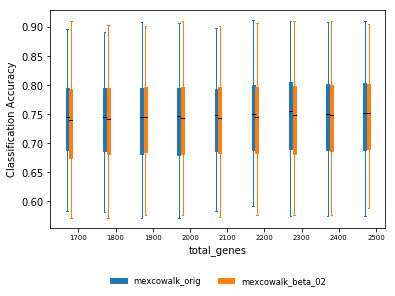

In [25]:
edge_colors = ['C0', 'C1']#,'C2', 'C3', 'C4']#['C0', 'C1', 'C4', 'C2', 'C3']
fill_colors = ['C0', 'C1']#'C2', 'C3', 'C4', 'C6', 'C7']

models = [
    'mexcowalk_orig',
    'mexcowalk_beta_02'
]

legend_ = [
    'mexcowalk_orig',
    'mexcowalk_beta_02'
]

plt.figsize= (40,40)
fig, ax = plt.subplots()

legend_artists = []

for idx,(model,edge_color, fill_color,l) in enumerate(zip(models, edge_colors, fill_colors,legend_)):
    print(l)
    sores_per_n = []
    N = list(range(1700,2600,100))

    ticks = [(f+1)*100 for f in range(len(N))]

    for n in N:
        results_file = '../results/knearst/revision/undersampel/{}/{}.txt'.format(model, n)
        with open(results_file, 'r') as f:
            lines= f.readlines()
            sores_per_n.append([float(s) for s  in lines[-1].rstrip().split(' ')[1:]])

    positions = [i_+(idx-3)*10 for i_ in ticks]

    l_art = draw_plot(sores_per_n, edge_color, None, N, positions)
    legend_artists.append(l_art)





art = []
xtick = ticks
xticks(xtick, fontsize='x-small')

ax.set_xticklabels(N, fontdict = {'fontsize':'x-small'})
ax.legend(legend_artists,legend_ , loc=8,fancybox=True, fontsize= 'small', framealpha=0,
                    edgecolor = 'b', ncol= 4, bbox_to_anchor=(0.5,-0.3))

# legend = plt.legend(legend_, loc=8,fancybox=True, fontsize= 'small', framealpha=0,
#                     edgecolor = 'b', ncol= 4, bbox_to_anchor=(0.5,-0.3))
# art.append(legend)
# frame = legend.get_frame()
# frame.set_facecolor('0.9')
# frame.set_edgecolor('0.9')
plt.xlabel('total_genes')
plt.ylabel('Classification Accuracy')
#list(range(100,1100,200))#+ list(range(600,800, 200))+list(range(900, 2600, 200))
# ax.set_xticklabels([str(xl) for xl in N[start:end] ], fontdict = {'fontsize':'x-small'})

# plt.ylim(0.825, 0.96)
# axes(frameon=0)
# grid()

plt.savefig('../results/knearst/revision/plots/Boxplots_Accuracy_0_{}.pdf'.format(2), format = 'pdf',additional_artists=art,
                    bbox_inches="tight", dpi = 800)
plt.show()

mexcowalk_orig
mexcowalk_beta_02


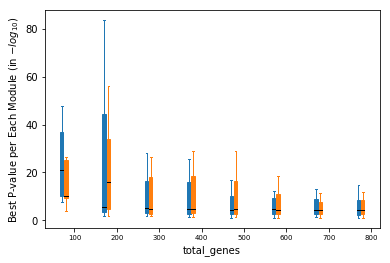

In [22]:
edge_colors = ['C0', 'C1']#,'C2', 'C3', 'C4']#['C0', 'C1', 'C4', 'C2', 'C3']
fill_colors = ['C0', 'C1']#'C2', 'C3', 'C4', 'C6', 'C7']

models = [
    'mexcowalk_orig',
    'mexcowalk_beta_02'
]

legend_ = [
    'mexcowalk_orig',
    'mexcowalk_beta_02'
]


plt.figsize= (30,30)
fig, ax = plt.subplots()

legend_artists = []
output_path = '../out/cancer_subtype_test_results'

for idx,(model,edge_color, fill_color,l) in enumerate(zip(models, edge_colors, fill_colors,legend_)):
    print(l)
    sores_per_n = []
    N = list(range(100,600,100))+ list(range(600,900, 100)) #+[554]+
#     N = a + list(range(900, 1700, 100)) if model  == 'memcover_v3' else a+list(range(900, 2600, 100))
    ticks = [(f+1)*100 for f in range(len(N))]
    if not model == 'hier_hotnet':

        for n in N:
            results_file = '{}/{}/cc_n{}_cancer_subtype_tests.txt'.format(output_path,model,n)

            with open(results_file, 'r') as f:
                try:
                    lines= f.readlines()
                    sores_per_n.append([float(s)  for s  in lines[-1].rstrip().split(' ')])
                except:
                    print('file: ',results_file )
        positions = [i_+(idx-3)*10 for i_ in ticks]

        l_art = draw_plot(sores_per_n, edge_color, None, N, positions)
        legend_artists.append(l_art)

    else:
        
        N_ = 554

        results_file = '{}/{}/cc_n{}_cancer_subtype_tests.txt'.format(output_path,model,N_)
        with open(results_file, 'r') as f:
            lines= f.readlines()
            sores_per_n.append([float(s) for s  in lines[-1].rstrip().split(' ')])

        scores =  [[] for _ in range(100,600,100)]+sores_per_n
        positions = [i_+(idx-3)*10 for i_ in ticks[:6]]
        l_art = draw_plot(scores, 'C8', None,  N[:6] ,positions)
        legend_artists.append(l_art)
            




art = []
xtick = ticks
xticks(xtick, fontsize='x-small')

ax.set_xticklabels(N, fontdict = {'fontsize':'x-small'})
# ax.legend(legend_artists,legend_ , loc=8,fancybox=True, fontsize= 'small', framealpha=0,
#                     edgecolor = 'b', ncol= 4, bbox_to_anchor=(0.5,-0.3))

# legend = plt.legend(legend_, loc=8,fancybox=True, fontsize= 'small', framealpha=0,
#                     edgecolor = 'b', ncol= 4, bbox_to_anchor=(0.5,-0.3))
# art.append(legend)
# frame = legend.get_frame()
# frame.set_facecolor('0.9')
# frame.set_edgecolor('0.9')
plt.xlabel('total_genes')
plt.ylabel('Best P-value per Each Module (in $-log_{10}$)')
# grid()

plt.savefig(output_path+'/Logpval_{}.pdf'.format(0), format = 'pdf',additional_artists=art,
                    bbox_inches="tight", dpi = 800)

plt.show()

mexcowalk_orig
mexcowalk_beta_02


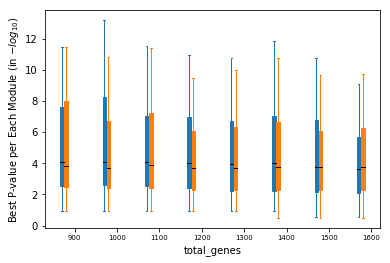

In [20]:
edge_colors = ['C0', 'C1']#,'C2', 'C3', 'C4']#['C0', 'C1', 'C4', 'C2', 'C3']
fill_colors = ['C0', 'C1']#'C2', 'C3', 'C4', 'C6', 'C7']

models = [
    'mexcowalk_orig',
    'mexcowalk_beta_02'
]

legend_ = [
    'mexcowalk_orig',
    'mexcowalk_beta_02'
]


plt.figsize= (30,30)
fig, ax = plt.subplots()

legend_artists = []
output_path = '../out/cancer_subtype_test_results'
for idx,(model,edge_color, fill_color,l) in enumerate(zip(models, edge_colors, fill_colors,legend_)):
    print(l)
    sores_per_n = []
    N =  list(range(900,1700,100))#[806]+
#     N = a + list(range(900, 1700, 100)) if model  == 'memcover_v3' else a+list(range(900, 2600, 100))
    ticks = [(f+1)*100 for f in range(len(N))]
    if not model == 'hier_hotnet':

        for n in N:
            results_file = '{}/{}/cc_n{}_cancer_subtype_tests.txt'.format(output_path,model,n)

            with open(results_file, 'r') as f:
                try:
                    lines= f.readlines()
#                     print(lines[-1])
                    sores_per_n.append([float(s) for s  in lines[-1].rstrip().split(' ')])
                except:
                    print('file: ',results_file, '\n',lines[-1] )

        positions = [i_+(idx-3)*10 for i_ in ticks]

        l_art = draw_plot(sores_per_n, edge_color, None, N, positions)
        legend_artists.append(l_art)

    else:
        
        N_ = 806

        # for n in [554,806]:
        results_file = '{}/{}/cc_n{}_cancer_subtype_tests.txt'.format(output_path,model,N_)
        with open(results_file, 'r') as f:
            lines= f.readlines()
            sores_per_n.append([float(s) for s  in lines[-1].rstrip().split(' ')])

        scores =  sores_per_n
        l_art = draw_plot(scores, 'k', None,  [N_] ,[N_ +(idx-3)*10])
        legend_artists.append(l_art)




art = []
xtick = ticks
xticks(xtick, fontsize='x-small')

ax.set_xticklabels(N, fontdict = {'fontsize':'x-small'})
# ax.legend(legend_artists,legend_ , loc=8,fancybox=True, fontsize= 'small', framealpha=0,
#                     edgecolor = 'b', ncol= 4, bbox_to_anchor=(0.5,-0.3))

# legend = plt.legend(legend_, loc=8,fancybox=True, fontsize= 'small', framealpha=0,
#                     edgecolor = 'b', ncol= 4, bbox_to_anchor=(0.5,-0.3))
# art.append(legend)
# frame = legend.get_frame()
# frame.set_facecolor('0.9')
# frame.set_edgecolor('0.9')
plt.xlabel('total_genes')
plt.ylabel('Best P-value per Each Module (in $-log_{10}$)')
# grid()

plt.savefig(output_path+'/Logpval_{}.pdf'.format(1), format = 'pdf',additional_artists=art,
                    bbox_inches="tight", dpi = 800)

plt.show()

mexcowalk_orig
mexcowalk_beta_02


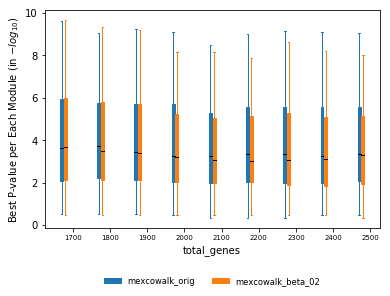

In [24]:
edge_colors = ['C0', 'C1']#,'C2', 'C3', 'C4']#['C0', 'C1', 'C4', 'C2', 'C3']
fill_colors = ['C0', 'C1']#'C2', 'C3', 'C4', 'C6', 'C7']

models = [
    'mexcowalk_orig',
    'mexcowalk_beta_02'
]

legend_ = [
    'mexcowalk_orig',
    'mexcowalk_beta_02'
]


plt.figsize= (40,40)
fig, ax = plt.subplots()

legend_artists = []
output_path = '../out/cancer_subtype_test_results'
for idx,(model,edge_color, fill_color,l) in enumerate(zip(models, edge_colors, fill_colors,legend_)):
    print(l)
    sores_per_n = []
    N = list(range(1700,2600,100))
    ticks = [(f+1)*100 for f in range(len(N))]
    if not model == 'hier_hotnet':

        for n in N:
            results_file = '{}/{}/cc_n{}_cancer_subtype_tests.txt'.format(output_path,model,n)

            with open(results_file, 'r') as f:
                try:
                    lines= f.readlines()
#                     print(lines[-1])
                    sores_per_n.append([float(s) for s  in lines[-1].rstrip().split(' ')])
                except:
                    print('file: ',results_file, '\n',lines[-1] )
#             f.close()

        positions = [i_+(idx-3)*10 for i_ in ticks]

        l_art = draw_plot(sores_per_n, edge_color, None, N, positions)
        legend_artists.append(l_art)


art = []
xtick = ticks
xticks(xtick, fontsize='x-small')

ax.set_xticklabels(N, fontdict = {'fontsize':'x-small'})
ax.legend(legend_artists,legend_ , loc=8,fancybox=True, fontsize= 'small', framealpha=0,
                    edgecolor = 'b', ncol= 4, bbox_to_anchor=(0.5,-0.3))

# legend = plt.legend(legend_, loc=8,fancybox=True, fontsize= 'small', framealpha=0,
#                     edgecolor = 'b', ncol= 4, bbox_to_anchor=(0.5,-0.3))
# art.append(legend)
# frame = legend.get_frame()
# frame.set_facecolor('0.9')
# frame.set_edgecolor('0.9')
plt.xlabel('total_genes')
plt.ylabel('Best P-value per Each Module (in $-log_{10}$)')
# grid()

plt.savefig(output_path+'/Logpval_{}.pdf'.format(2), format = 'pdf',additional_artists=art,
                    bbox_inches="tight", dpi = 800)

plt.show()

In [227]:
a = np.array([[1,2,3],[1,2,3]])
a.mean(axis=0), np.percentile(a,q=0.025, axis=0)


(array([1., 2., 3.]), array([1., 2., 3.]))